In [1]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential, Model, load_model
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, LeakyReLU, Activation, BatchNormalization, ZeroPadding2D, Add, GlobalAveragePooling2D
from keras.utils import np_utils
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.optimizers import Adam
from keras import Input

import numpy as np
import matplotlib.pyplot as plt

d:\anaconda\envs\tensorflow\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
d:\anaconda\envs\tensorflow\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
d:\anaconda\envs\tensorflow\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
d:\anaconda\envs\tensorflow\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWa

In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

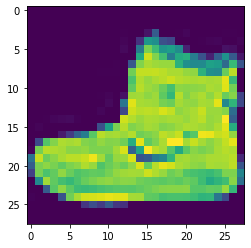

In [3]:
plt.imshow(train_images[0], interpolation='nearest')
plt.show()

In [4]:
train_images = train_images.reshape(train_images.shape[0], train_images.shape[1], train_images.shape[2], 1).astype('float32') / 255
test_images = test_images.reshape(test_images.shape[0], test_images.shape[1], test_images.shape[2], 1).astype('float32') / 255
print(train_images.shape)
print(test_images.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [5]:
train_labels = np_utils.to_categorical(train_labels, 10)
test_labels = np_utils.to_categorical(test_labels, 10)
print(train_labels.shape)
print(test_labels.shape)

(60000, 10)
(10000, 10)


In [6]:
import cv2

use_scale = 0.05  # 메모리가 부족하여, 트레이닝 셋을 줄였습니다.
i = 0
resized_train_images = []
resized_test_images = []
while i < len(train_images) * use_scale:
  resized_image = cv2.resize(train_images[i], (224, 224), interpolation = cv2.INTER_AREA)  # 28x28 to 224 x 224
  resized_train_images.append(resized_image)
  resized_image = cv2.resize(test_images[i], (224, 224), interpolation = cv2.INTER_AREA)
  resized_test_images.append(resized_image)
  i += 1

del(train_images)
del(test_images)

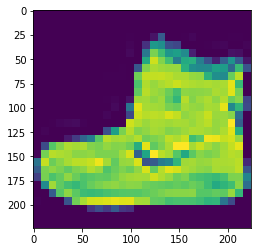

In [7]:
img = np.array(resized_train_images[0])
plt.imshow(img, interpolation='nearest')
plt.show()

In [8]:
np_resized_train_images = np.asarray(resized_train_images, dtype=np.float32)  # array to numpy
np_resized_test_images = np.asarray(resized_test_images, dtype=np.float32)
del(resized_train_images)
del(resized_test_images)

In [9]:
# 28 x 28 to 28 x 28 x 1
np_resized_train_images = np_resized_train_images.reshape(np_resized_train_images.shape[0], np_resized_train_images.shape[1], np_resized_train_images.shape[2], 1)
np_resized_test_images = np_resized_test_images.reshape(np_resized_test_images.shape[0], np_resized_test_images.shape[1], np_resized_test_images.shape[2], 1)

In [10]:
print(np_resized_train_images.shape)
print(np_resized_test_images.shape)

(3000, 224, 224, 1)
(3000, 224, 224, 1)


In [11]:
# 28 x 28 x 1 to 28 x 28 x 3
# 단순히 1개의 채널에 있던 값을 복사하여 3개의 채널로 만들었습니다.. 
# 별다른 복원 알고리즘이 없어서 그런지,  흑백이미지가 되었습니다
np_stacked_resized_train_images = np.stack((np_resized_train_images,)*3, axis=-1)
np_stacked_resized_train_images = np.squeeze(np_stacked_resized_train_images)
np_stacked_resized_test_images = np.stack((np_resized_test_images,)*3, axis=-1)
np_stacked_resized_test_images = np.squeeze(np_stacked_resized_test_images)
del(np_resized_train_images)
del(np_resized_test_images)

In [12]:
print(np_stacked_resized_train_images[0])

[[[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 ...

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]]


In [13]:
print(np_stacked_resized_train_images.shape)
print(np_stacked_resized_test_images.shape)

(3000, 224, 224, 3)
(3000, 224, 224, 3)


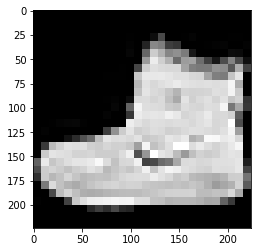

In [14]:
img = np_stacked_resized_train_images[0]
plt.imshow(img, interpolation='nearest')
plt.show()

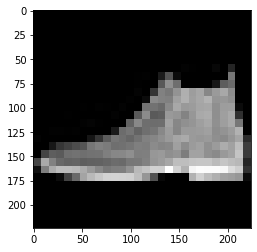

In [15]:
img = np_stacked_resized_test_images[0]
plt.imshow(img, interpolation='nearest')
plt.show()

In [16]:
# 모델 시작 (resnet 50)

from keras import Input
input_tensor = Input(shape=(224, 224, 3), dtype='float32', name='input')  # input : 224 x 224 x 3

W0818 17:15:51.393556  7320 deprecation_wrapper.py:119] From d:\anaconda\envs\tensorflow\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.



In [17]:
# Conv 1

x = ZeroPadding2D(padding=(3, 3))(input_tensor)
x = Conv2D(64, (7, 7), strides=(2, 2))(x)   # Conv 7x7, 64, /2
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = ZeroPadding2D(padding=(1,1))(x)

W0818 17:15:51.438530  7320 deprecation_wrapper.py:119] From d:\anaconda\envs\tensorflow\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0818 17:15:51.445528  7320 deprecation_wrapper.py:119] From d:\anaconda\envs\tensorflow\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0818 17:15:51.481506  7320 deprecation_wrapper.py:119] From d:\anaconda\envs\tensorflow\lib\site-packages\keras\backend\tensorflow_backend.py:174: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_default_session instead.

W0818 17:15:51.482505  7320 deprecation_wrapper.py:119] From d:\anaconda\envs\tensorflow\lib\site-packages\keras\backend\tensorflow_backend.py:181: The name tf.ConfigProto is deprecated. Please use tf.compat.v1.ConfigProto instead.

W0818 17:15:53.039614  7320 deprecation_wrap

In [18]:
# Conv 2

x = MaxPooling2D((3, 3), 2)(x)  # pool /2

shortcut = x   # x

for i in range(3):
    if (i == 0):  # 첫번째 루프에서는 shortcut의 필터크기가 x와 일치하지 않으므로 일치하게 만들어줍니다.
        x = Conv2D(64, (1, 1), strides=(1, 1), padding='valid')(x)  # filter 는 2배씩 증가
        x = BatchNormalization()(x)
        x = Activation('relu')(x)

        x = Conv2D(64, (3, 3), strides=(1, 1), padding='same')(x)   # kernel size가 1 -> 3 -> 1로 변하는 bottle neck 구간
        x = BatchNormalization()(x)  # Conv 3x3, 64
        x = Activation('relu')(x)

        x = Conv2D(256, (1, 1), strides=(1, 1), padding='valid')(x)  
        shortcut = Conv2D(256, (1, 1), strides=(1, 1), padding='valid')(shortcut)            
        x = BatchNormalization()(x)    #  F(x)
        shortcut = BatchNormalization()(shortcut)

        x = Add()([x, shortcut])  #  x + F(x), skip connection
        x = Activation('relu')(x)

        shortcut = x  # 이전 루프 결과 저장

    else:
        x = Conv2D(64, (1, 1), strides=(1, 1), padding='valid')(x)
        x = BatchNormalization()(x)
        x = Activation('relu')(x)

        x = Conv2D(64, (3, 3), strides=(1, 1), padding='same')(x)
        x = BatchNormalization()(x)
        x = Activation('relu')(x)

        x = Conv2D(256, (1, 1), strides=(1, 1), padding='valid')(x)
        x = BatchNormalization()(x)            

        x = Add()([x, shortcut])   
        x = Activation('relu')(x)  

        shortcut = x        

W0818 17:15:53.148553  7320 deprecation_wrapper.py:119] From d:\anaconda\envs\tensorflow\lib\site-packages\keras\backend\tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.



In [19]:
# Conv 3

shortcut = x    
    
for i in range(4):     
    if(i == 0):          
        # pooling을 하였던 Conv2를 제외하고는 각 Conv 레이어의 첫 부분은 stride를 2로 함
        x = Conv2D(128, (1, 1), strides=(2, 2), padding='valid')(x)                                                                       
        x = BatchNormalization()(x)
        x = Activation('relu')(x)        

        x = Conv2D(128, (3, 3), strides=(1, 1), padding='same')(x)
        x = BatchNormalization()(x)    # Conv 3x3, 128
        x = Activation('relu')(x)  

        x = Conv2D(512, (1, 1), strides=(1, 1), padding='valid')(x)
        shortcut = Conv2D(512, (1, 1), strides=(2, 2), padding='valid')(shortcut)
        x = BatchNormalization()(x)
        shortcut = BatchNormalization()(shortcut)            

        x = Add()([x, shortcut])    
        x = Activation('relu')(x)    

        shortcut = x              

    else:
        x = Conv2D(128, (1, 1), strides=(1, 1), padding='valid')(x)
        x = BatchNormalization()(x)
        x = Activation('relu')(x)

        x = Conv2D(128, (3, 3), strides=(1, 1), padding='same')(x)
        x = BatchNormalization()(x)
        x = Activation('relu')(x)

        x = Conv2D(512, (1, 1), strides=(1, 1), padding='valid')(x)
        x = BatchNormalization()(x)            

        x = Add()([x, shortcut])     
        x = Activation('relu')(x)

        shortcut = x      

In [20]:
# Conv 4

shortcut = x        

for i in range(6):     
    if(i == 0):            
        x = Conv2D(256, (1, 1), strides=(2, 2), padding='valid')(x)
        x = BatchNormalization()(x)
        x = Activation('relu')(x)        

        x = Conv2D(256, (3, 3), strides=(1, 1), padding='same')(x)
        x = BatchNormalization()(x)   # Conv 3x3, 256
        x = Activation('relu')(x)  

        x = Conv2D(1024, (1, 1), strides=(1, 1), padding='valid')(x)
        shortcut = Conv2D(1024, (1, 1), strides=(2, 2), padding='valid')(shortcut)
        x = BatchNormalization()(x)
        shortcut = BatchNormalization()(shortcut)

        x = Add()([x, shortcut]) 
        x = Activation('relu')(x)

        shortcut = x               

    else:
        x = Conv2D(256, (1, 1), strides=(1, 1), padding='valid')(x)
        x = BatchNormalization()(x)
        x = Activation('relu')(x)

        x = Conv2D(256, (3, 3), strides=(1, 1), padding='same')(x)
        x = BatchNormalization()(x)
        x = Activation('relu')(x)

        x = Conv2D(1024, (1, 1), strides=(1, 1), padding='valid')(x)
        x = BatchNormalization()(x)            

        x = Add()([x, shortcut])    
        x = Activation('relu')(x)

        shortcut = x      

In [21]:
# Conv 5

shortcut = x    

for i in range(3):     
    if(i == 0):            
        x = Conv2D(512, (1, 1), strides=(2, 2), padding='valid')(x)
        x = BatchNormalization()(x)
        x = Activation('relu')(x)        

        x = Conv2D(512, (3, 3), strides=(1, 1), padding='same')(x)
        x = BatchNormalization()(x)   # Conv 3x3, 512
        x = Activation('relu')(x)  

        x = Conv2D(2048, (1, 1), strides=(1, 1), padding='valid')(x)
        shortcut = Conv2D(2048, (1, 1), strides=(2, 2), padding='valid')(shortcut)
        x = BatchNormalization()(x)
        shortcut = BatchNormalization()(shortcut)            

        x = Add()([x, shortcut])  
        x = Activation('relu')(x)      

        shortcut = x               

    else:
        x = Conv2D(512, (1, 1), strides=(1, 1), padding='valid')(x)
        x = BatchNormalization()(x)
        x = Activation('relu')(x)

        x = Conv2D(512, (3, 3), strides=(1, 1), padding='same')(x)
        x = BatchNormalization()(x)
        x = Activation('relu')(x)

        x = Conv2D(2048, (1, 1), strides=(1, 1), padding='valid')(x)
        x = BatchNormalization()(x)           

        x = Add()([x, shortcut]) 
        x = Activation('relu')(x)       

        shortcut = x   

In [22]:
x = GlobalAveragePooling2D()(x)   # 1차원으로 풀링(플래트닝)
output_tensor = Dense(10, activation='softmax')(x)  # output
 
resnet50 = Model(input_tensor, output_tensor)  # input과 output을 가지고 model 생성
resnet50.summary()


__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input (InputLayer)              (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
zero_padding2d_1 (ZeroPadding2D (None, 230, 230, 3)  0           input[0][0]                      
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 112, 112, 64) 9472        zero_padding2d_1[0][0]           
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 112, 112, 64) 256         conv2d_1[0][0]                   
__________________________________________________________________________________________________
activation

In [23]:
resnet50.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

W0818 17:16:02.028090  7320 deprecation_wrapper.py:119] From d:\anaconda\envs\tensorflow\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



In [24]:
train_labels = train_labels[0:3000, :]   # train_image 갯수에 맞게 label 갯수 조정
test_labels = test_labels[0:3000, :]   # train_image 갯수에 맞게 label 갯수 조정

In [25]:
print(train_labels.shape)
print(test_labels.shape)

(3000, 10)
(3000, 10)


In [26]:
# 메모리 한계를 고려하여 batch_size는 4,  epoch은 20으로 함 
resnet50.fit(np_stacked_resized_train_images, train_labels, epochs=20, batch_size=4)

W0818 17:16:02.266952  7320 deprecation.py:323] From d:\anaconda\envs\tensorflow\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/20
3000/3000 [==============================] - 220s 73ms/step - loss: 1.6990 - acc: 0.4523
Epoch 2/20
3000/3000 [==============================] - 197s 66ms/step - loss: 0.9152 - acc: 0.6713
Epoch 3/20
3000/3000 [==============================] - 200s 67ms/step - loss: 0.8190 - acc: 0.7147
Epoch 4/20
3000/3000 [==============================] - 201s 67ms/step - loss: 0.7100 - acc: 0.7530
Epoch 5/20
3000/3000 [==============================] - 195s 65ms/step - loss: 0.6263 - acc: 0.7713
Epoch 6/20
3000/3000 [==============================] - 191s 64ms/step - loss: 0.5625 - acc: 0.7930
Epoch 7/20
3000/3000 [==============================] - 194s 65ms/step - loss: 0.5230 - acc: 0.8163
Epoch 8/20
3000/3000 [==============================] - 193s 64ms/step - loss: 0.4959 - acc: 0.8160
Epoch 9/20
3000/3000 [==============================] - 194s 65ms/step - loss: 0.4698 - acc: 0.8323
Epoch 10/20
3000/3000 [==============================] - 198s 66ms/step - loss: 0.4425 - acc: 0.8400

In [27]:
print("Accuracy : %.4f" % (resnet50.evaluate(np_stacked_resized_test_images, test_labels)[1]))

3000/3000 [==============================] - 33s 11ms/step
Accuracy : 0.8513
